### DDW - PageRank, graph embeddings

In [ ]:
! pip install numpy

In [1]:
import numpy as np

#### Arrays/Matrices

In [2]:
# 1D array
a = np.zeros(3)
print("1D:\n{}\n".format(a))

# 2D array
a = np.zeros((3,3))
print("2D:\n{}\n".format(a))

# fill with a specific value
a.fill(1)
print("fill:\n{}\n".format(a))

# initialize wiht values
a = np.array([[1, 2, 3], [4, 5, 6]])
print("2D:\n{}\n".format(a))

# indexing
print("First row:\n{}\n".format(a[0]))
print("First column:\n{}\n".format(a[:,0]))
print("Specific element:\n{}\n".format(a[1,1]))

# Aggregations
print("Row sum:\n{}\n".format(a[0,:].sum()))
print("Column sum:\n{}\n".format(a[:,0].sum()))

1D:
[0. 0. 0.]

2D:
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]

fill:
[[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]]

2D:
[[1 2 3]
 [4 5 6]]

First row:
[1 2 3]

First column:
[1 4]

Specific element:
5

Row sum:
6

Column sum:
5



#### Operations

In [3]:
# convert to a matrix
a = np.array([[1,2,3],[4,5,6]])
m = np.matrix(a)
print("Matrix:\n{}\n".format(m))

# multiply (transpose)
mm = m*m.transpose()
print("Multiplication:\n{}\n".format(mm))

Matrix:
[[1 2 3]
 [4 5 6]]

Multiplication:
[[14 32]
 [32 77]]



### PageRank

H:
[[0. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]]

PageRank:
[[0.   0.75 0.   0.  ]]
S:
[[0. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]]

PageRank:
[[5.82076609e-11 1.00000000e+00 5.82076609e-11 5.82076609e-11]]


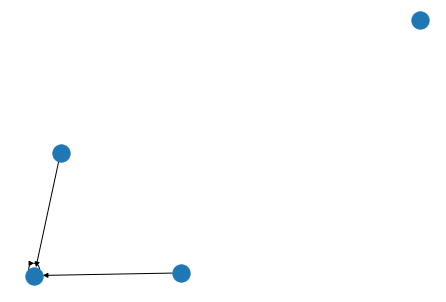

In [11]:
import numpy as np
import networkx as nx

def createH(inputFile):
    text = None
    with open(inputFile, 'r') as f:
        text = f.read()
    lines = text.splitlines()
    sz = int(lines[0])
    H = np.zeros((sz, sz))
    
    for i in range(1, sz):
        if i == 0:
            continue
        for xx in lines[i].split(" "):
            ln = xx.split(":")
            if xx == "":
                continue
            H[int(ln[0])][int(ln[1])] = 1

    print("H:\n{}\n".format(H))
    return(H)

def createS(H):
    e = np.empty((H.shape[0], 1))
    e.fill(1/H.shape[0])
    a = np.zeros((H.shape[0],1))
            
    for ii in range(e.shape[0]):
        if H[ii].sum()==0:
            a[ii] = 1
    S = H + a*e
    print("S:\n{}\n".format(H))
    return(S)


def computePR(M, iterations):
    pv = np.zeros(M.shape[0])
    pv.fill(1/M.shape[0])
    pv = np.matrix(pv)
    for i in range(iterations):
        pv = pv*M
    print("PageRank:")
    print(pv)
    

inputFile = "./data/test2.txt"
alpha = 0.9
iterations = 16

H = createH(inputFile)
nx.draw(nx.DiGraph(H))
computePR(H, iterations)

S = createS(H)
computePR(S, iterations)

### Graph embeddings

In [13]:
! pip install node2vec
! pip install ipywidgets

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


Computing transition probabilities:   0%|          | 0/34 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 50/50 [00:00<00:00, 241.39it/s]


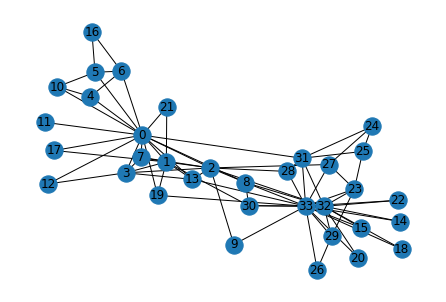

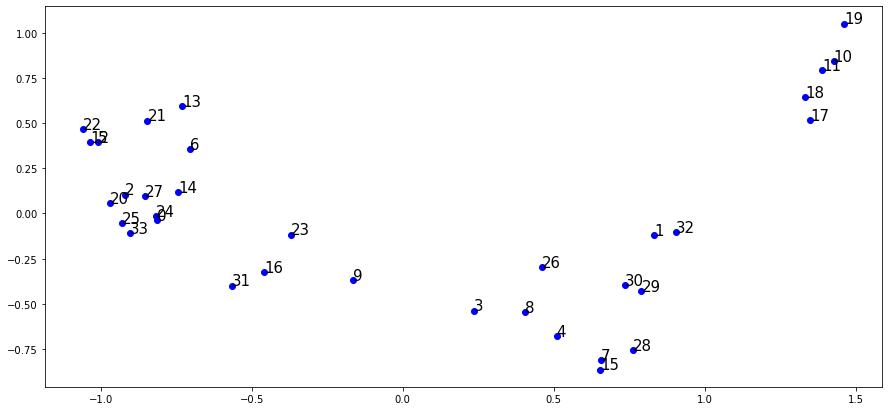

In [1]:
import networkx as nx
from node2vec import Node2Vec
from sklearn.decomposition import PCA 
import matplotlib.pyplot as plt
from tqdm import tqdm as tqdm

# prepare graph
G = nx.karate_club_graph()
nx.draw(G, with_labels=True)

# node2vec
node2vec = Node2Vec(G, dimensions=50, walk_length=15, num_walks=200, workers=4)
model = node2vec.fit(window=5, min_count=1, batch_words=4)

# visualize
pca = PCA(n_components=2)
pca_comps = pca.fit_transform(model.wv.vectors)
plt.figure(figsize=(15, 7))
plt.scatter(pca_comps[:, 0], pca_comps[:, 1], c='blue')
for name, x, y in zip(G.nodes(), pca_comps[:, 0], pca_comps[:, 1]):
        plt.annotate(name, xy=(x, y), size=15)